### Imports

In [282]:
# standard imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# import google drive
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Loading Data

In [283]:
# LOLChallenger Data
df = pd.read_csv('/content/gdrive/MyDrive/DS Capstone/LOLChallengerData.csv')

# This data was obtained from Data Collection.ipynb and is already cleaned and preproccesed

df.head()

,uuid,matchId,participants,puuid,endOfGameResult,gameCreation,gameDuration,gameEndTimestamp,gameId,patch,...,red_champ5,baron_first,baron_kills,dragon_first,dragon_kills,voidGrubs_first,voidGrubs_kills,riftHerald_first,riftHerald_kills,win
0,NA1_5217896604_lUwhJFpkG1G2J_vfyvVgiqq6XnjxPiy...,NA1_5217896604,['6KmRQimMpMtD7BTtf6CL9fiZsgOvsEqMJQ9DWo9ruouG...,lUwhJFpkG1G2J_vfyvVgiqq6XnjxPiyvN3La-ndEwvkr8E...,GameComplete,1738175911211,911,1738176841038,5217896604,15.2.652.1536,...,Rell,False,0,False,1,True,3,False,0,True
1,NA1_5218153804_DhtM5zsRupYXokd--hps6-QeJgKEcjl...,NA1_5218153804,['G_nzu-NTPdrPJ3q2DejOxZhkDMbtliS-jNf-CrMkhA-R...,DhtM5zsRupYXokd--hps6-QeJgKEcjla1gHFYzNKQHrr6i...,GameComplete,1738201764847,2258,1738204047475,5218153804,15.2.652.1536,...,Lulu,True,2,False,1,False,3,True,1,True
2,NA1_5218352456_xnL-HGxw_Oky--zZ3JlkRok-7mHUijv...,NA1_5218352456,['taecuw6a0mrKbkQdsbzO2BbXdo0WFkYU7goBIA2OkIWT...,xnL-HGxw_Oky--zZ3JlkRok-7mHUijv04wR84trn56fWf_...,GameComplete,1738214940364,1771,1738216734652,5218352456,15.2.652.1536,...,Fiora,False,0,False,1,True,3,True,1,False
3,NA1_5221431675_IQsbBhcpGHd4ucRUiv1HO4vsWgbv5iV...,NA1_5221431675,['b_7a8jwoVC_os6S2ryiNtfy9a91dmNHAzBfPKRqMlpyy...,IQsbBhcpGHd4ucRUiv1HO4vsWgbv5iV4QSx7AGSK4uqn4_...,GameComplete,1738562124804,1529,1738563674488,5221431675,15.2.652.1536,...,Sona,False,0,True,2,False,3,True,1,False
4,NA1_5218820131__iQIDTVLids-Tfn_6SXSUdZLKX_RHcZ...,NA1_5218820131,['2gho7hrPxsR5T0tqKxxEX9xqS1K-1AZV13w6qOw58yau...,_iQIDTVLids-Tfn_6SXSUdZLKX_RHcZIhOSW_NzFAvazyO...,GameComplete,1738286258443,1548,1738287826106,5218820131,15.2.652.1536,...,Nautilus,False,0,True,2,False,0,False,0,False


#### Data Set Description

In [304]:
# basic dataset information
"""
data types and amounts: bool(10), float64(1), int64(86), object(41)
there are 10,957 rows and 138 columns

"""
df.info()
print(f"\nShape of the data: {df.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10957 entries, 0 to 10956
Columns: 140 entries, uuid to gameDurationMinutes
dtypes: bool(10), float64(3), int64(86), object(41)
memory usage: 11.0+ MB

Shape of the data: (10957, 140)


In [285]:
"""
There are only a few missing values:

Summoner name is missing 972 values but is not an important value for
understinding the game.

Team Position is missing 2 values but can easily be figured out due to the two
other values that show what the player lane is.

"""

# Missing data points, only show non 0 values
df.isnull().sum()[df.isnull().sum() != 0]

,0
summonerName,972
teamPosition,2


In [286]:
# creating data dictionary

# making table
df_dict = pd.DataFrame()

# assigning names
col_names = df.columns.to_list()
df_dict['Name'] = col_names

# descriptions
df_dict['Description'] = None

# data type
df_dict['Data Type'] = df.dtypes.to_list()
# Replace data types based on the column types
df_dict['Data Type'] = df_dict['Data Type'].apply(lambda x: 'Nominal' if x == 'object' or x == 'bool' else ('Ratio' if pd.api.types.is_numeric_dtype(x) else 'Unknown'))

# range of values
# Create dictionary with min and max values for numeric columns and unique values for categorical columns
values_dict = {}
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):  # For numeric columns
        # Only store the min and max values for numerical columns
        values_dict[col] = (df[col].min(), df[col].max())
    else:  # For categorical columns
        # Store unique values for categorical columns
        values_dict[col] = df[col].unique().tolist()
# Add the min and max (or unique values) to df_dict['Range of Values']
df_dict['Range of Values'] = df_dict['Name'].apply(lambda x: values_dict.get(x, None))
# Changing the id rows to just say ids
df_dict.loc[0:3, 'Range of Values'] = 'ids'

# percent of missing data
values_dict = {}
for col in df.columns:
    missing_count = df[col].isnull().sum()
    total_count = len(df[col])
    missing_percentage = (missing_count / total_count) * 100
    values_dict[col] = missing_percentage

# appending it to the dataframe
df_dict['Percent of Missing Data'] = df_dict['Name'].apply(lambda x: values_dict.get(x, None))
#add percentages to it
df_dict['Percent of Missing Data'] = df_dict['Percent of Missing Data'].apply(lambda x: round(x, 2))

# Displaying dataframe
df_dict

#saving dataframe for easy extraction
#df_dict.to_csv('/content/gdrive/MyDrive/DS Capstone/Data Dictionary.csv', index=False)

# download the file
#files.download('/content/gdrive/MyDrive/DS Capstone/Data Dictionary.csv')

,Name,Description,Data Type,Range of Values,Percent of Missing Data
0,uuid,None,Nominal,ids,0.0
1,matchId,None,Nominal,ids,0.0
2,participants,None,Nominal,ids,0.0
3,puuid,None,Nominal,ids,0.0
4,endOfGameResult,None,Nominal,[GameComplete],0.0
...,...,...,...,...,...
133,voidGrubs_first,None,Nominal,"(False, True)",0.0
134,voidGrubs_kills,None,Ratio,"(0, 6)",0.0
135,riftHerald_first,None,Nominal,"(False, True)",0.0
136,riftHerald_kills,None,Ratio,"(0, 1)",0.0


### Data Set Summary Statistics

In [287]:
"""
Interesting Findings:

Kills: mean -5.610842 , median -5 , std - 4.293417
Deaths: mean -4.867665 , median -5 , std - 2.952838
assist: mean -8.199507 , median -7 , std - 5.913332
time played: mean - 1589.77859s or 26.5m, median - 1631s or 27.18m, std - 412.0156s or 6.87m
turretTakedowns: mean -2.224149 , median - 2.000000 , std - 2.148373
gold: mean -10741.2 , median -10635 , std -3669.3

baron_kills: mean - 0.310760 , median - 0 , std - 0.525271 (team)
dragon_kills: mean - 1.794561 , median - 2 , std - 1.262562 (team)

baronKills: mean - 0.065803 , median - 0 , std - 0.26468 (player) only really get these if you are the jungler
dragonKills: mean - 0.367619 , median - 0 , std - 0.823799 (player) only really get these if you are the jungler

voidGrubs_kills: mean - 3.059688 , median - 3 , std - 2.140104
"""


# 5 number summary of the data set
df.describe()


# 5 number summary of interesting values
df[['kills','deaths','assists','timePlayed','turretTakedowns','goldEarned','goldSpent','baron_kills','dragon_kills','baronKills','dragonKills','voidGrubs_kills']].describe()

,kills,deaths,assists,timePlayed,turretTakedowns,goldEarned,goldSpent,baron_kills,dragon_kills,baronKills,dragonKills,voidGrubs_kills
count,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000,10957.000000
mean,5.610842,4.867665,8.199507,1589.778589,2.224149,10741.199781,9843.546774,0.310760,1.794561,0.065803,0.367619,3.059688
std,4.293417,2.952838,5.913332,412.015638,2.148373,3669.306390,3542.196076,0.525271,1.262562,0.264685,0.823799,2.140104
min,0.000000,0.000000,0.000000,100.000000,0.000000,502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,4.000000,1335.000000,0.000000,8075.000000,7325.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,5.000000,5.000000,7.000000,1631.000000,2.000000,10635.000000,9700.000000,0.000000,2.000000,0.000000,0.000000,3.000000
75%,8.000000,7.000000,11.000000,1835.000000,4.000000,13239.000000,12100.000000,1.000000,3.000000,0.000000,0.000000,5.000000
max,30.000000,18.000000,42.000000,3193.000000,11.000000,26280.000000,39050.000000,4.000000,6.000000,3.000000,6.000000,6.000000


In [288]:
"""
Interesting Findings:

Moderate correlation between turrets lost and deaths(plus time spent dead and %time dead)
Moderate correlations between assists with vision score and wards places (probably supports)
Moderate correlation between team kills and turret take downs
moderate correlation between champ experience and level with kills
STRONG correlation between gold earned and gold spent with kills

"""

# correlation table
df.select_dtypes(include='number').corr()

# important correlations
df[['kills','deaths','assists','turretTakedowns','turretsLost','visionScore','wardsPlaced','champLevel','goldEarned','goldSpent']].corr()

,kills,deaths,assists,turretTakedowns,turretsLost,visionScore,wardsPlaced,champLevel,goldEarned,goldSpent
kills,1.000000,0.060669,0.074378,0.376767,-0.048322,-0.134484,-0.203094,0.545421,0.758607,0.720740
deaths,0.060669,1.000000,0.136104,-0.154426,0.588746,0.200252,0.186093,0.255353,0.238430,0.295136
assists,0.074378,0.136104,1.000000,0.344339,-0.017332,0.595517,0.526995,0.336524,0.272585,0.243651
turretTakedowns,0.376767,-0.154426,0.344339,1.000000,-0.289418,0.081187,0.073383,0.456567,0.516517,0.439269
turretsLost,-0.048322,0.588746,-0.017332,-0.289418,1.000000,0.157403,0.138798,0.250319,0.198331,0.269633
visionScore,-0.134484,0.200252,0.595517,0.081187,0.157403,1.000000,0.920521,0.064843,0.006127,0.004415
wardsPlaced,-0.203094,0.186093,0.526995,0.073383,0.138798,0.920521,1.000000,-0.016088,-0.087204,-0.084129
champLevel,0.545421,0.255353,0.336524,0.456567,0.250319,0.064843,-0.016088,1.000000,0.891094,0.866519
goldEarned,0.758607,0.238430,0.272585,0.516517,0.198331,0.006127,-0.087204,0.891094,1.000000,0.971818
goldSpent,0.720740,0.295136,0.243651,0.439269,0.269633,0.004415,-0.084129,0.866519,0.971818,1.000000


In [289]:
#Finding the outliers for each variable
"""
Notable Findings:

No outliers in the following catagories: 'unrealKills','cs','totalAllyJungleMinionsKilled','totalEnemyJungleMinionsKilled','holdPings','visionClearedPings',
 'sightWardsBoughtInGame','turretsLost','defense','offense','dragon_kills','voidGrubs_kills','riftHerald_kills (CS, wards, all major objectives)

Areas with large number of outliers: neutralMinionsKilled, dragon kills


From the pings: the enemy missing ping was 2nd lowest compared to vision ping (misisng is used for flaming and vision shows wards on the map)
other ping types have larger outliers

Turret take downs only had one

baron kills has around 600 outliers which is suprisingly high. (this is for personal)

"""

# Function to calculate outliers for numerical columns and return in a table
def find_outliers(df):
    # Select only numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    outlier_counts = []

    for col in numerical_cols:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define outlier criteria
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts.append([col, outliers.shape[0]])

    # Create a DataFrame to display the outlier counts
    outlier_df = pd.DataFrame(outlier_counts, columns=['Column', 'Outlier Count'])
    return outlier_df

outliers_table = find_outliers(df)

outliers_table


,Column,Outlier Count
0,gameCreation,703
1,gameDuration,223
2,gameEndTimestamp,703
3,gameId,709
4,kills,154
...,...,...
82,totalTimeCCDealt,713
83,baron_kills,13
84,dragon_kills,0
85,voidGrubs_kills,0


### Graphical exploration

#### Histograms

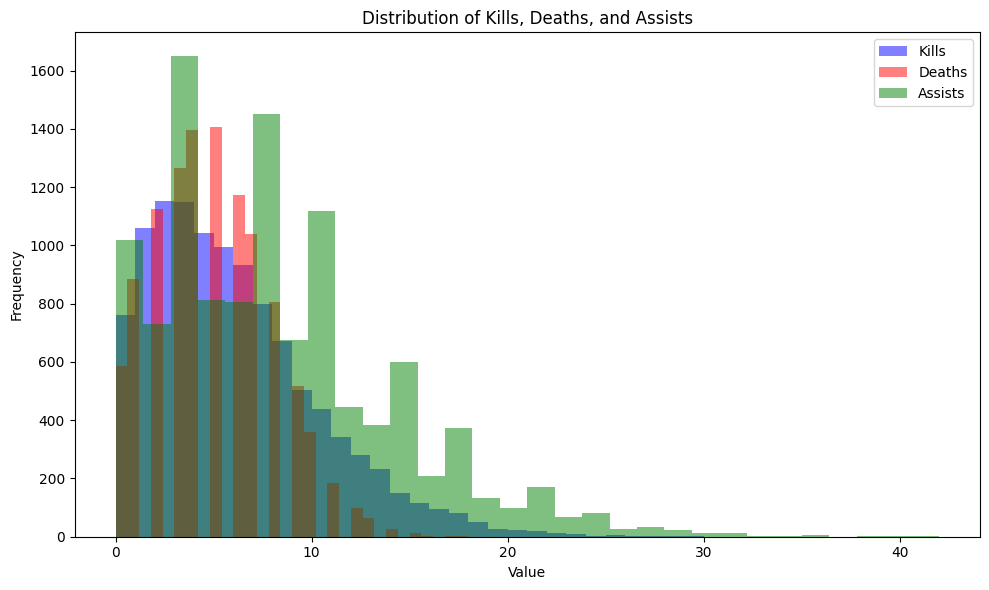

In [290]:
# Histograms of kills, deaths and assists



# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot histograms for kills, deaths, and assists
plt.hist(df['kills'], bins=30, alpha=0.5, label='Kills', color='blue')
plt.hist(df['deaths'], bins=30, alpha=0.5, label='Deaths', color='red')
plt.hist(df['assists'], bins=30, alpha=0.5, label='Assists', color='green')

# Add title and labels
plt.title('Distribution of Kills, Deaths, and Assists')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add legend to differentiate the histograms
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# the k/d/a all seemes to be right skewed

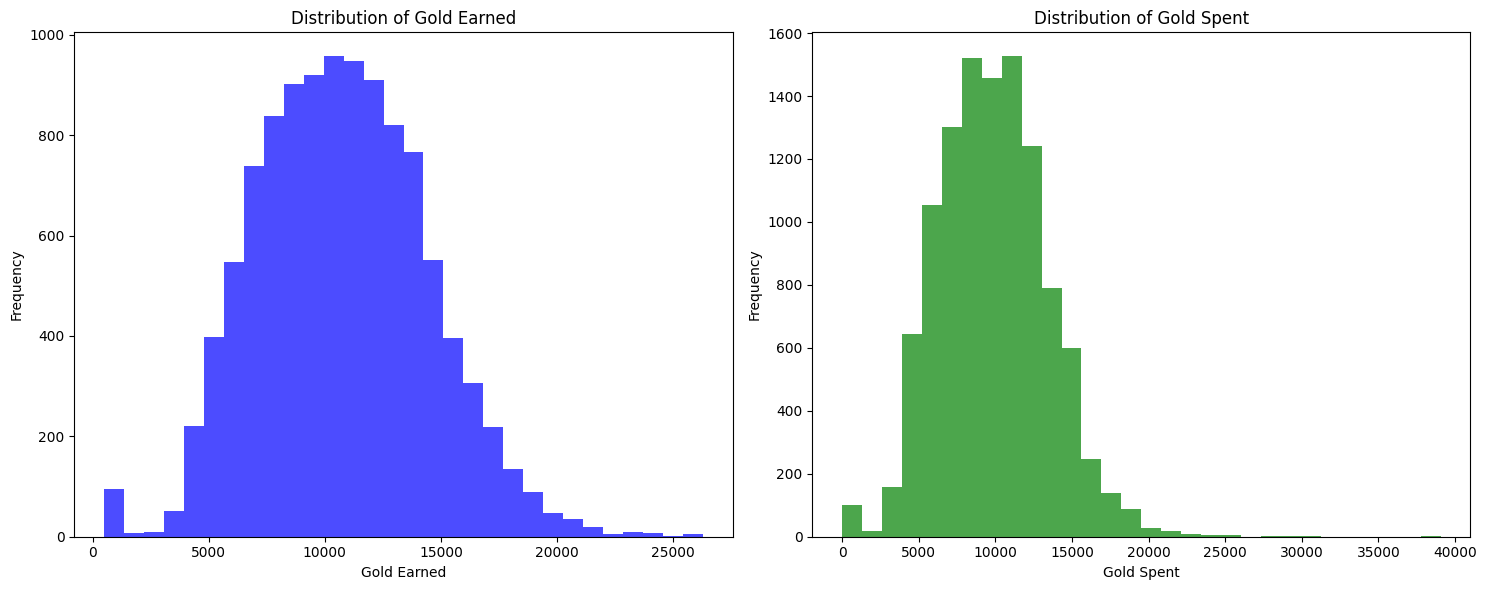

In [291]:
import matplotlib.pyplot as plt

# Create subplots for goldEarned and goldSpent
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot the histogram for goldEarned
axes[0].hist(df['goldEarned'], bins=30, alpha=0.7, color='blue')
axes[0].set_title('Distribution of Gold Earned')
axes[0].set_xlabel('Gold Earned')
axes[0].set_ylabel('Frequency')

# Plot the histogram for goldSpent
axes[1].hist(df['goldSpent'], bins=30, alpha=0.7, color='green')
axes[1].set_title('Distribution of Gold Spent')
axes[1].set_xlabel('Gold Spent')
axes[1].set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


# distributions of both are normal with gold spent having a much smaller spread than the gold earned, probably due to the gold gained when ending the game.


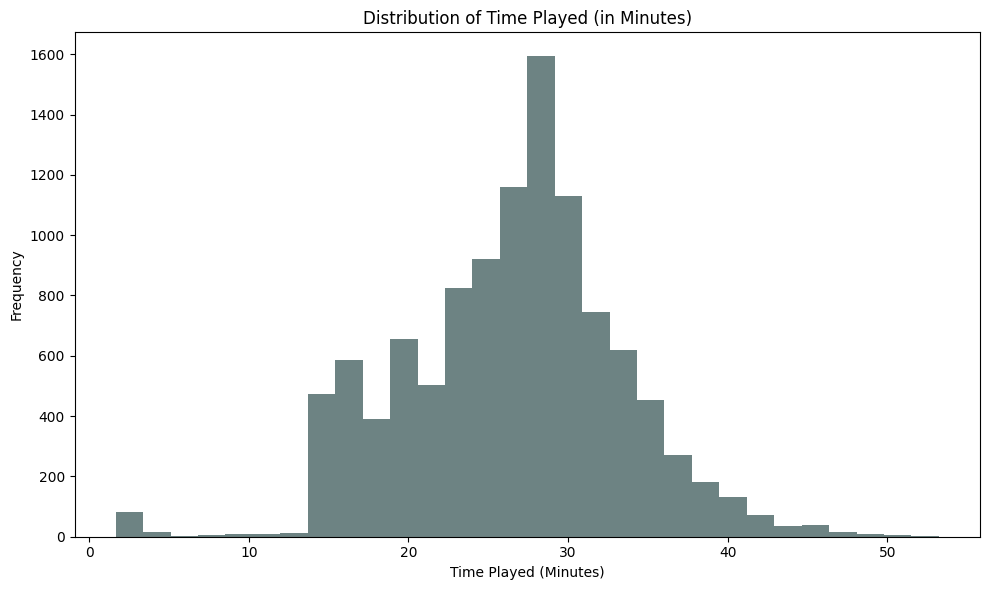

In [292]:
#histogram for time played

# Convert time played from seconds to minutes
df['timePlayedMinutes'] = df['timePlayed'] / 60

# Plot the histogram for time played in minutes
plt.figure(figsize=(10, 6))
plt.hist(df['timePlayedMinutes'], bins=30, alpha=0.7, color='darkslategray')
plt.title('Distribution of Time Played (in Minutes)')
plt.xlabel('Time Played (Minutes)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# cannot remake after 3 minutes in the game btw
# Time played seemes to be normally distributed with a few anomolies due to how games can end

#### Pie Charts

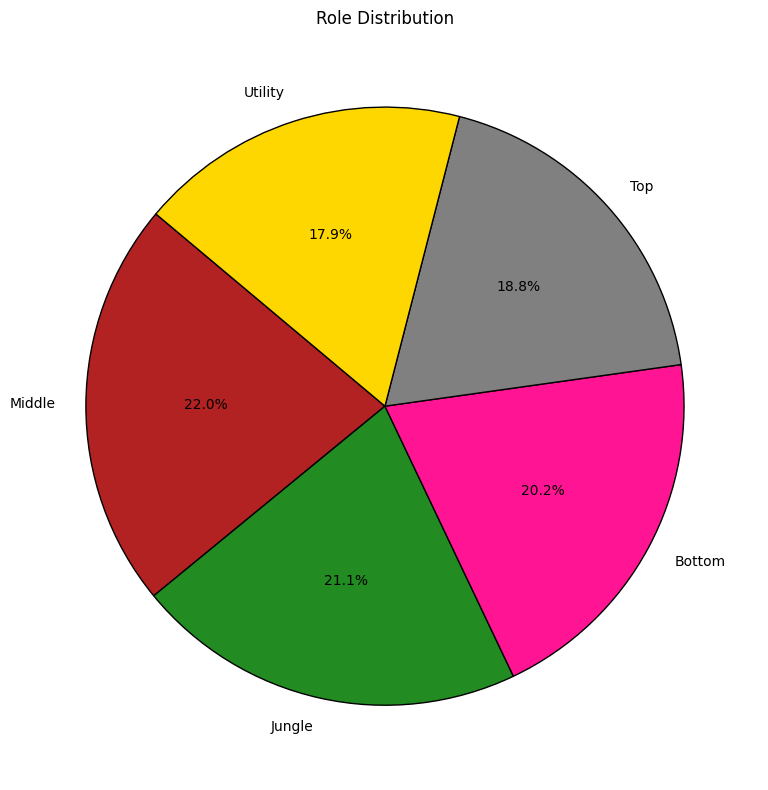

In [293]:
#Distribution of the roles

# Rename 'utility' to 'support' in the 'teamPosition' column
df['teamPosition'] = df['teamPosition'].replace('utility', 'support')

# Get the value counts for the 'teamPosition' column
team_position_counts = df['teamPosition'].value_counts(ascending=False)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(team_position_counts, labels=[label.title() for label in team_position_counts.index],
        autopct='%1.1f%%', colors=['firebrick', 'forestgreen', 'deeppink', 'grey', 'gold'],
        startangle=140, wedgeprops={'edgecolor': 'black'})

# Set the title
plt.title('Role Distribution')

plt.tight_layout()
plt.show()

# Distributions of role types seem pretty even across the ladder but in order from least to greatest is Support, Top, Bottom, Jungle, Middle

#### Bar Charts

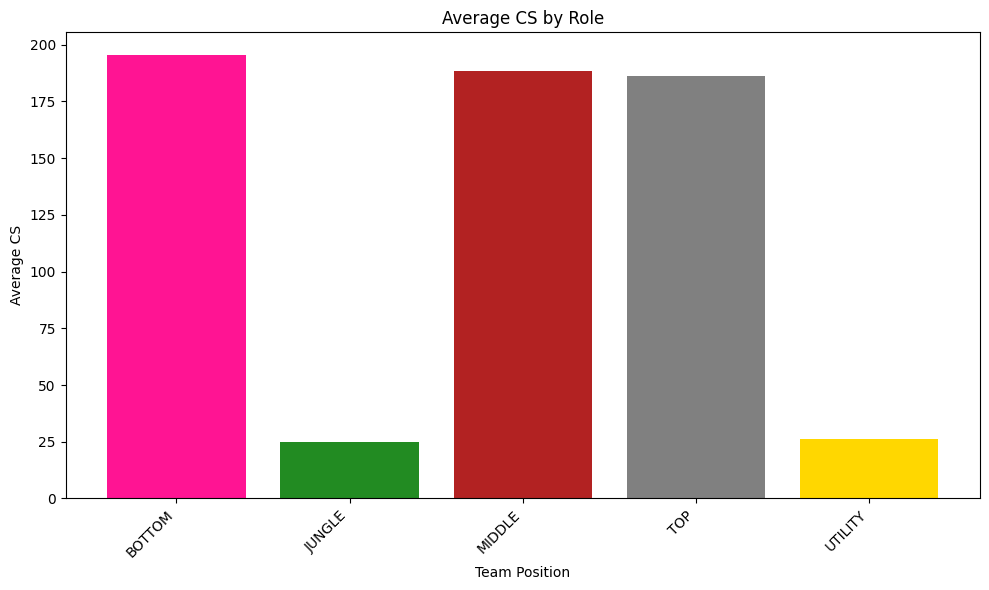

In [294]:
# average cs by role bar graph

# Rename 'utility' to 'support' in the 'teamPosition' column
df['teamPosition'] = df['teamPosition'].replace('utility', 'support')

# Group by 'teamPosition' and calculate the mean 'cs'
cs_by_role = df.groupby('teamPosition')['cs'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(cs_by_role['teamPosition'], cs_by_role['cs'], color=['deeppink','forestgreen','firebrick','grey','gold'],)

# Set the title and labels
plt.title('Average CS by Role')
plt.xlabel('Team Position')
plt.ylabel('Average CS')

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Bottom players have the highest average cs while middle and top are shortly behind and jungle and utility both have really low average cs values.
# This could cause issues with predicting jungler patterns

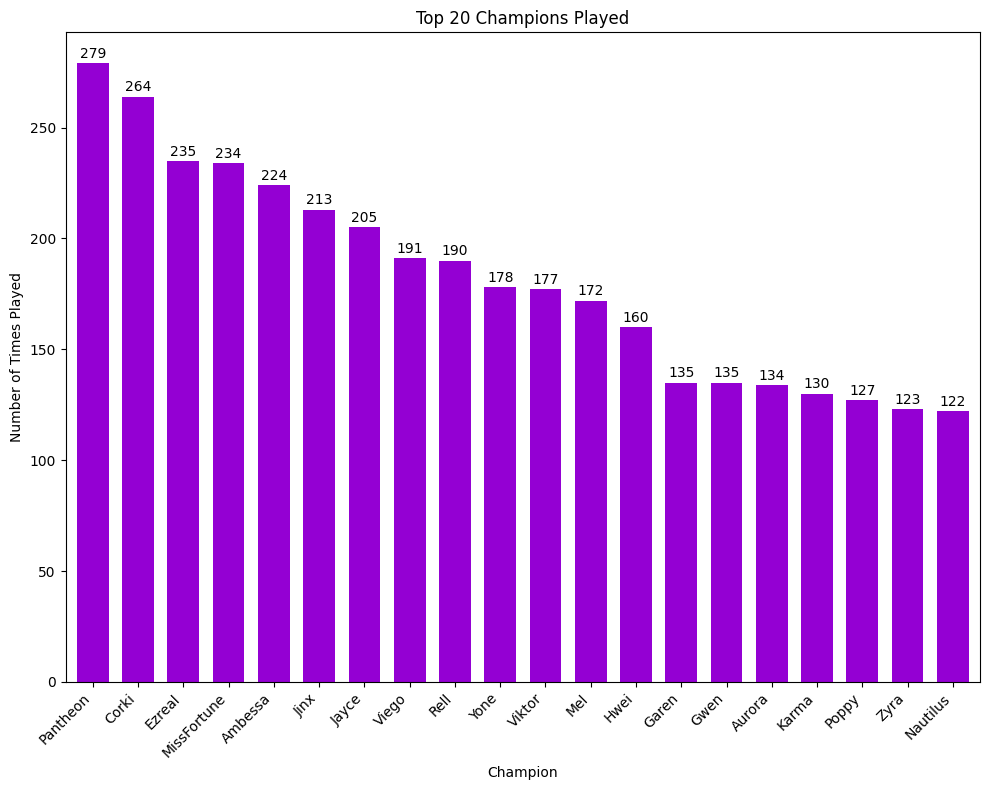

In [305]:
# Get the top 20 champions played
top_20_champions = df['championName'].value_counts().head(20)

# Create a vertical bar graph with reduced bar spacing
plt.figure(figsize=(10, 8))
top_20_champions.plot(kind='bar', color='darkviolet', width=0.7)  # Reduce the width for smaller bar spacing

# Add labels and title
plt.title('Top 20 Champions Played')
plt.xlabel('Champion')
plt.ylabel('Number of Times Played')

# Add the count labels on top of the bars
for i, v in enumerate(top_20_champions):
    plt.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### Scatter Plots

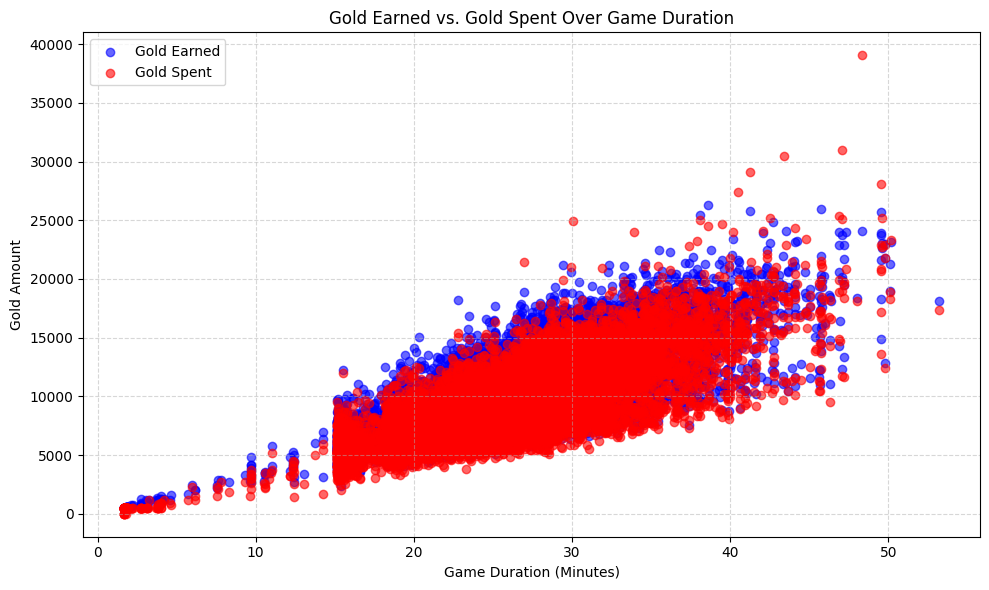

In [295]:
# Convert game duration to minutes
df['gameDurationMinutes'] = df['gameDuration'] / 60

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['gameDurationMinutes'], df['goldEarned'], color='blue', alpha=0.6, label='Gold Earned')
plt.scatter(df['gameDurationMinutes'], df['goldSpent'], color='red', alpha=0.6, label='Gold Spent')

# Add labels and title
plt.xlabel('Game Duration (Minutes)')
plt.ylabel('Gold Amount')
plt.title('Gold Earned vs. Gold Spent Over Game Duration')

# Add legend to differentiate gold earned and spent
plt.legend()

# Improve readability
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

# gold earned and gold spent seems to also follow the same thing as histogram


#### Heat Maps

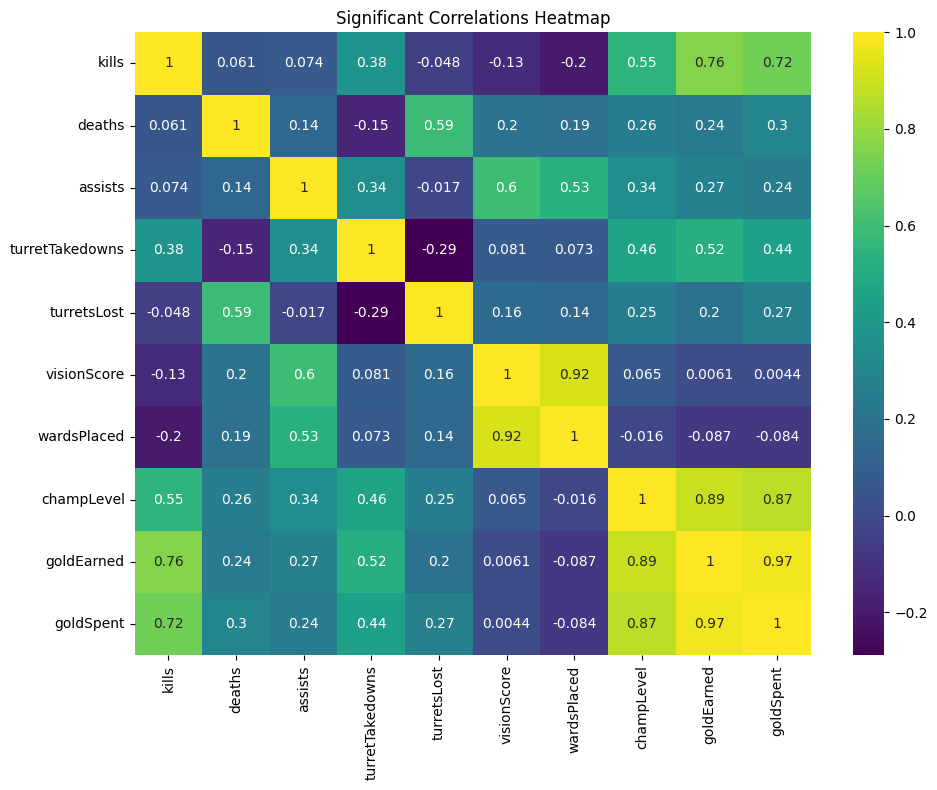

In [296]:
# Correlation heatmap of interesting trends

corr = df[['kills','deaths','assists','turretTakedowns','turretsLost','visionScore','wardsPlaced','champLevel','goldEarned','goldSpent']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='viridis')
# Add title
plt.title('Significant Correlations Heatmap')

# Show the plot
plt.tight_layout()
plt.show()

# just same thing as the correlation that was explored above